In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, balanced_accuracy_score, mean_squared_error, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, mean_squared_error, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('data/insurance_train.csv')
print(f"Shape of the dataset: {df.shape}")
df.head()

Shape of the dataset: (56993, 14)


reward  claim_status person_gender entity_type channel  \
0   0.000000             0      9b2d5b46      type_a     web   
1  18.428627             0      9b2d5b46      type_a     web   
2   0.000000             0      9b2d5b46      type_a     web   
3   0.000000             0      9b2d5b46      type_a     web   
4   0.000000             0      9b2d5b46      type_a     web   

   support_interactions  agent_id  customer_score  entity_a  person_age  \
0                     0  agt_0004        0.284509  50b3e71e          51   
1                     0  agt_0001        0.207538  96d6c6df          32   
2                     1  agt_0004        0.300461  50b3e71e          38   
3                     0  agt_0004        0.132404  50b3e71e          30   
4                     2  agt_0004        0.070443  50b3e71e          37   

        location     revenue              product_id  trip_length  
0  united states  105.459587         SecurePlan Flex           21  
1          spain   30.433459  DriveSafe Rental Addon            6  
2    new zealand   78.728474        TripGuard Cancel           84  
3       thailand   17.146843        TripGuard Cancel           39  
4       viet nam   10.476416        TripGuard Cancel           48

##  Visualizing Numeric Variable Distributions

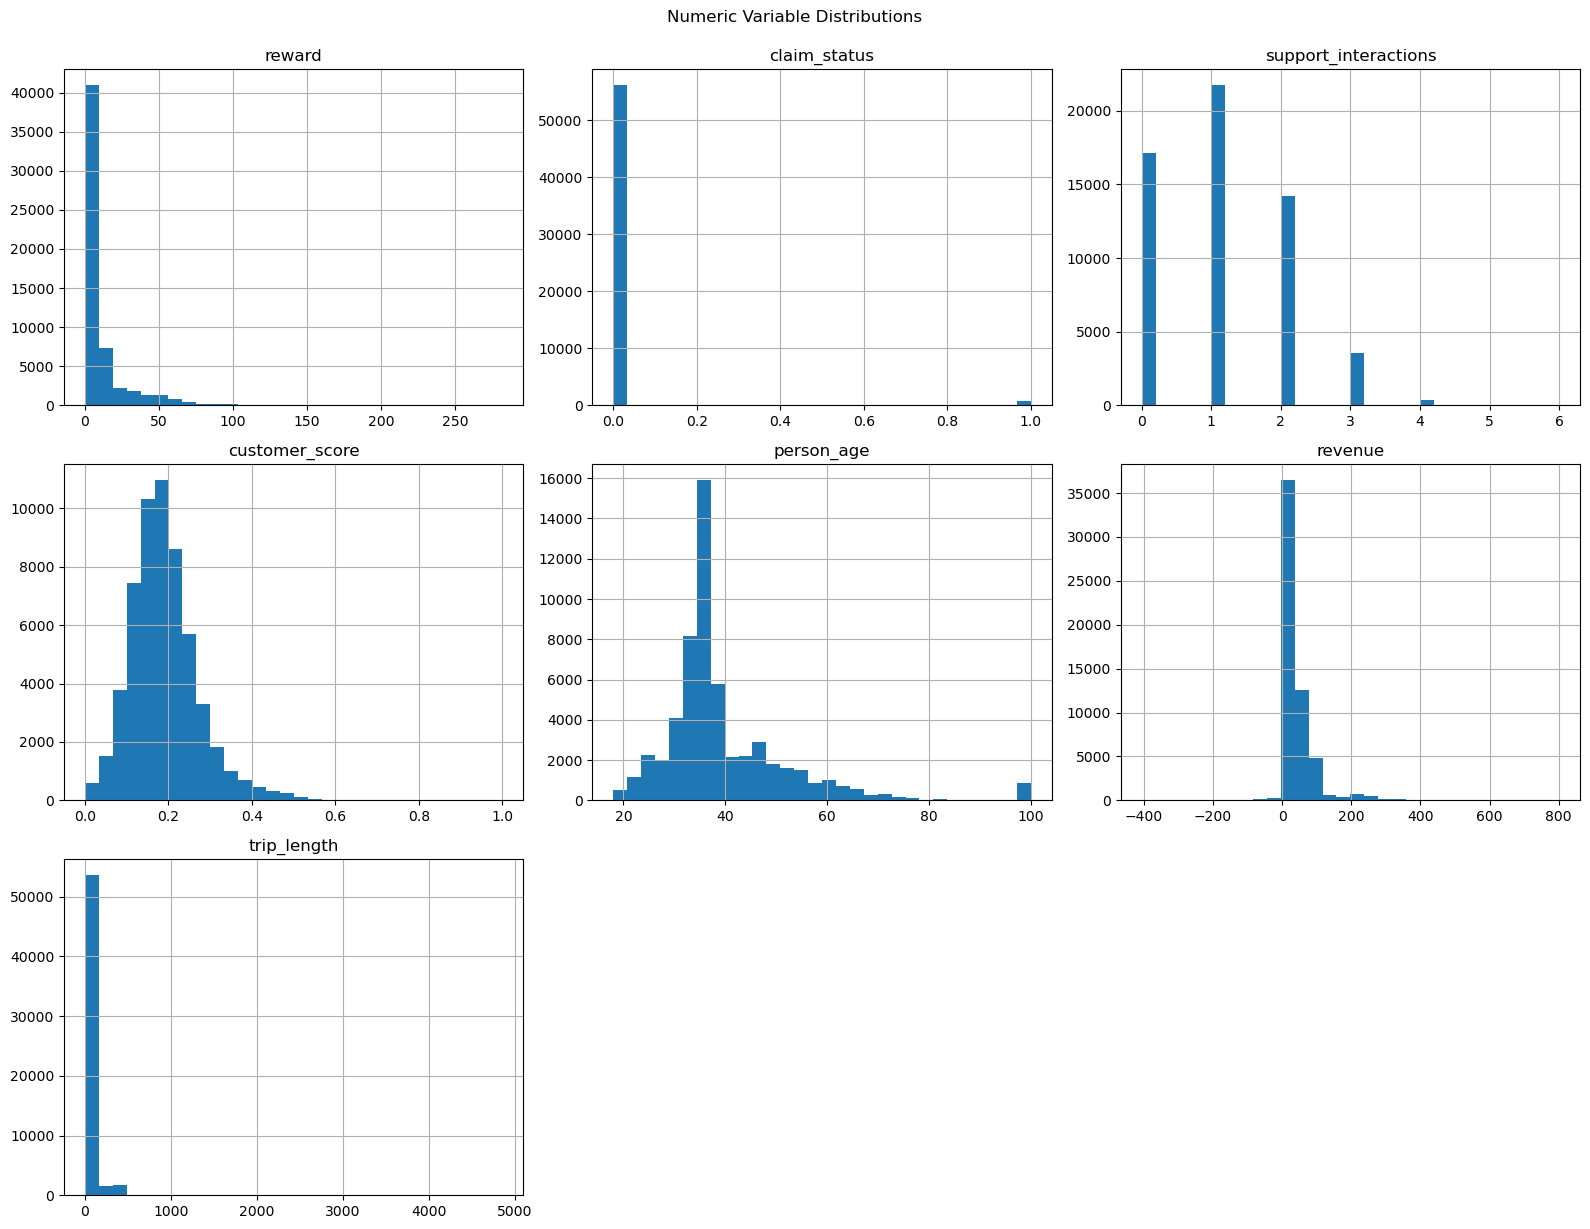

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(bins=30, figsize=(16, 12), layout=(3, 3))
plt.tight_layout()
plt.suptitle('Numeric Variable Distributions', y=1.02)
plt.show()

##  Frequency of Categorical Variables

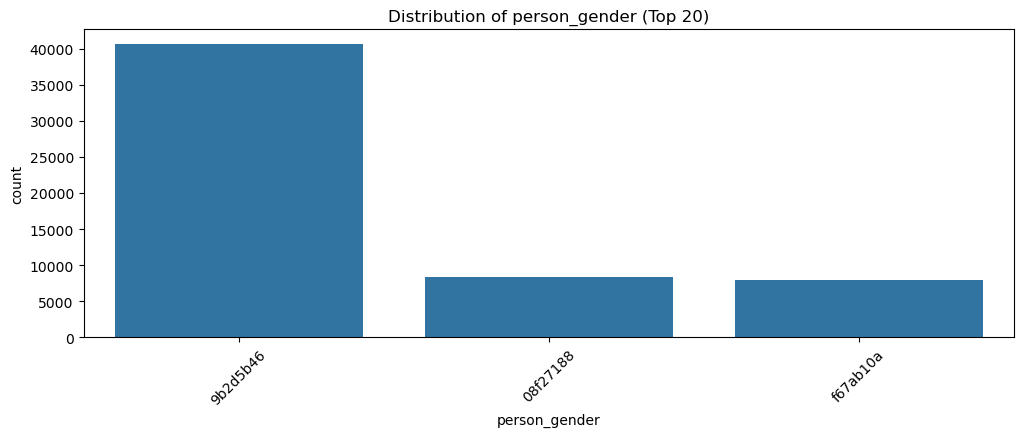

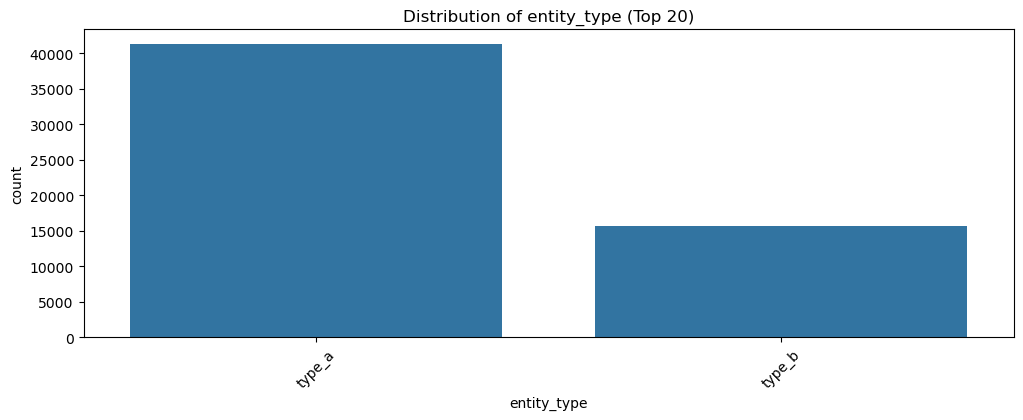

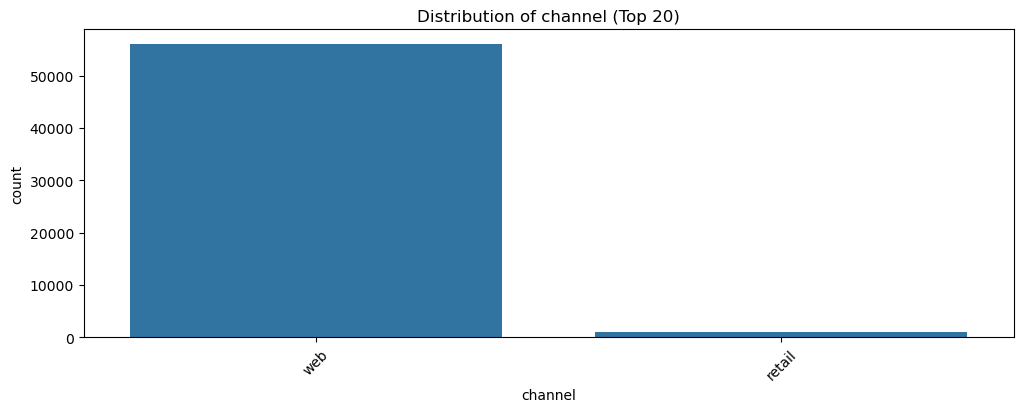

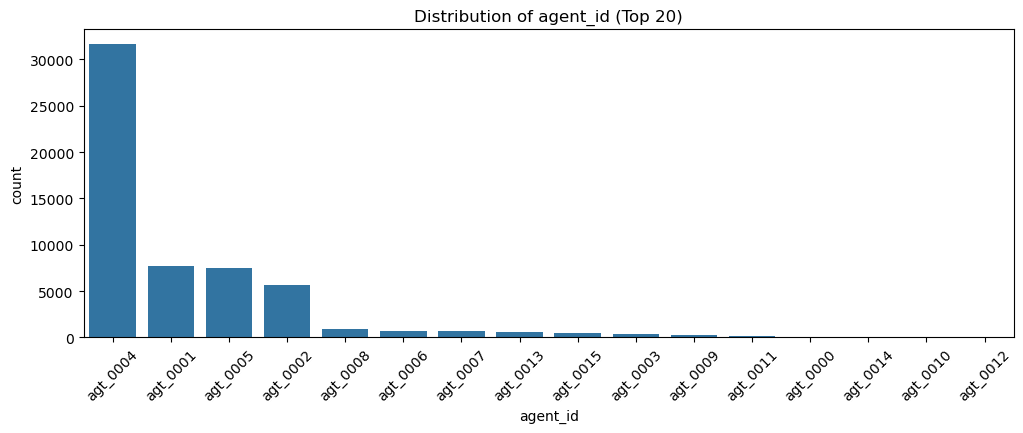

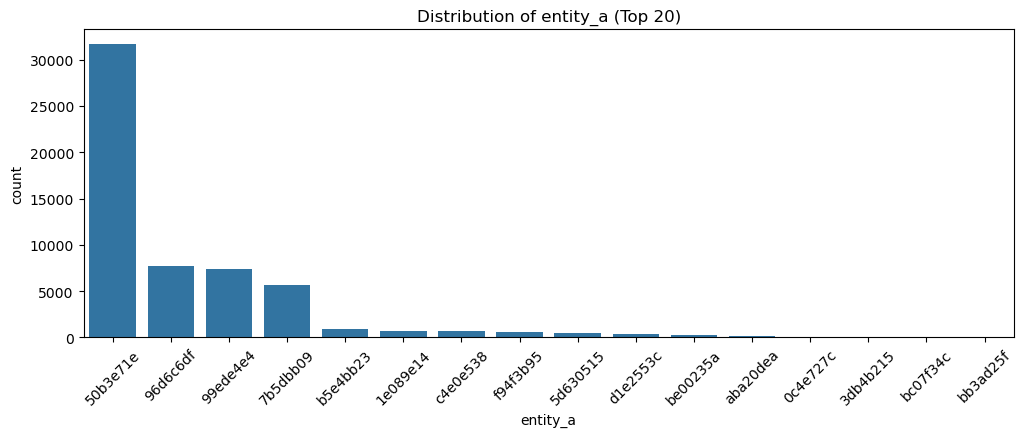

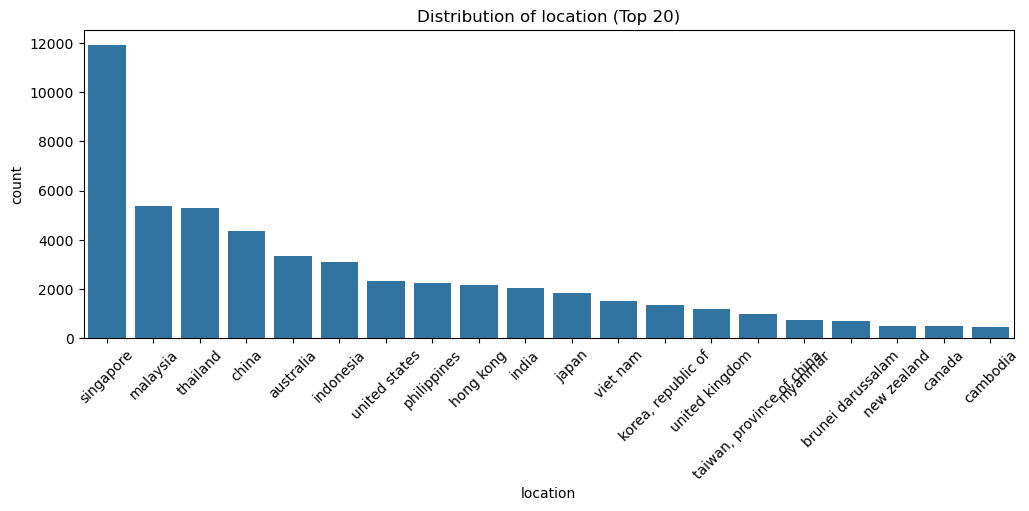

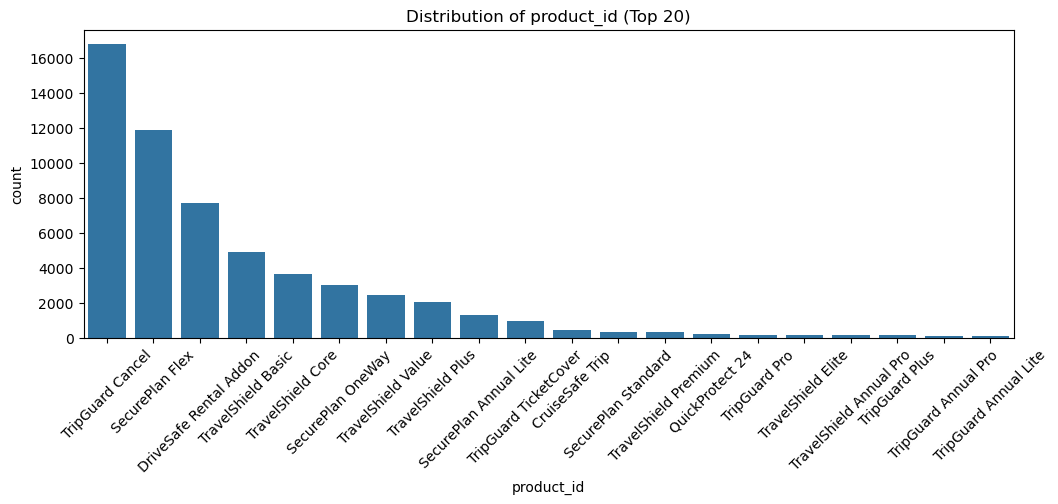

In [7]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:20].index)
    plt.title(f'Distribution of {col} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

In [96]:
#  Data Overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                56993 non-null  float64
 1   claim_status          56993 non-null  int64  
 2   person_gender         56993 non-null  object 
 3   entity_type           56993 non-null  object 
 4   channel               56993 non-null  object 
 5   support_interactions  56993 non-null  int64  
 6   agent_id              56993 non-null  object 
 7   customer_score        56993 non-null  float64
 8   entity_a              56993 non-null  object 
 9   person_age            56993 non-null  int64  
 10  location              56993 non-null  object 
 11  revenue               56993 non-null  float64
 12  product_id            56993 non-null  object 
 13  trip_length           56993 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 6.1+ MB


reward  claim_status person_gender entity_type channel  \
count   56993.000000  56993.000000         56993       56993   56993   
unique           NaN           NaN             3           2       2   
top              NaN           NaN      9b2d5b46      type_a     web   
freq             NaN           NaN         40643       41297   56019   
mean        9.794976      0.014633           NaN         NaN     NaN   
std        19.791119      0.120081           NaN         NaN     NaN   
min         0.000000      0.000000           NaN         NaN     NaN   
25%         0.000000      0.000000           NaN         NaN     NaN   
50%         0.000000      0.000000           NaN         NaN     NaN   
75%        11.336612      0.000000           NaN         NaN     NaN   
max       282.073580      1.000000           NaN         NaN     NaN   

        support_interactions  agent_id  customer_score  entity_a  \
count           56993.000000     56993    56993.000000     56993   
unique                   NaN        16             NaN        16   
top                      NaN  agt_0004             NaN  50b3e71e   
freq                     NaN     31663             NaN     31663   
mean                1.093941       NaN        0.189540       NaN   
std                 0.923113       NaN        0.080641       NaN   
min                 0.000000       NaN        0.000000       NaN   
25%                 0.000000       NaN        0.136389       NaN   
50%                 1.000000       NaN        0.181041       NaN   
75%                 2.000000       NaN        0.230836       NaN   
max                 6.000000       NaN        1.000000       NaN   

          person_age   location       revenue        product_id   trip_length  
count   56993.000000      56993  56993.000000             56993  56993.000000  
unique           NaN        146           NaN                26           NaN  
top              NaN  singapore           NaN  TripGuard Cancel           NaN  
freq             NaN      11942           NaN             16795           NaN  
mean       39.697261        NaN     40.750070               NaN     49.234888  
std        12.603433        NaN     48.749221               NaN     98.659469  
min        18.000000        NaN   -406.642669               NaN      1.000000  
25%        34.000000        NaN     18.246389               NaN      9.000000  
50%        36.000000        NaN     26.785242               NaN     22.000000  
75%        44.000000        NaN     47.809948               NaN     53.000000  
max       100.000000        NaN    801.049866               NaN   4856.000000

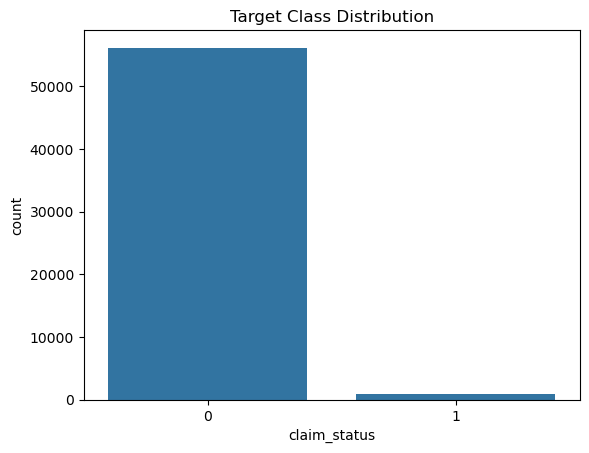

claim_status
0    0.985367
1    0.014633
Name: proportion, dtype: float64


In [98]:
sns.countplot(x='claim_status', data=df)
plt.title('Target Class Distribution')
plt.show()
print(df['claim_status'].value_counts(normalize=True))

# Data Preparation

In [137]:
# Categorical features to test
categorical_features = ['channel', 'entity_type', 'person_gender']

# Running ANOVA-test for each categorical feature
print("ANOVA Test Results:\n")
for col in categorical_features:
    # Drop NA values
    data = df[[col, 'claim_status']].dropna()
    groups = [data[data[col] == level]['claim_status'] for level in data[col].unique()]
    
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        print(f"{col}:\n  F-statistic = {f_stat:.4f}, p-value = {p_val:.6f}")
    else:
        print(f"{col}: Only one group present, ANOVA not applicable.")

ANOVA Test Results:

channel:
  F-statistic = 0.2211, p-value = 0.638199
entity_type:
  F-statistic = 577.9276, p-value = 0.000000
person_gender:
  F-statistic = 355.5624, p-value = 0.000000


In [102]:
X = df.drop('claim_status', axis=1)
y = df['claim_status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")

Train shape: (45594, 13), Validation shape: (11399, 13)


In [104]:
#Preprocessing pipeline definition
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

##  Logistic Regression

In [17]:
log_reg_pipeline = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
log_reg_pipeline.fit(X_train, y_train)
y_pred_log = log_reg_pipeline.predict(X_val)
y_proba_log = log_reg_pipeline.predict_proba(X_val)[:, 1]

Balanced Accuracy: 0.7765180109865739
RMSE: 0.4559747523957361
AUC: 0.8320735665421295
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     11232
           1       0.05      0.76      0.10       167

    accuracy                           0.79     11399
   macro avg       0.52      0.78      0.49     11399
weighted avg       0.98      0.79      0.87     11399



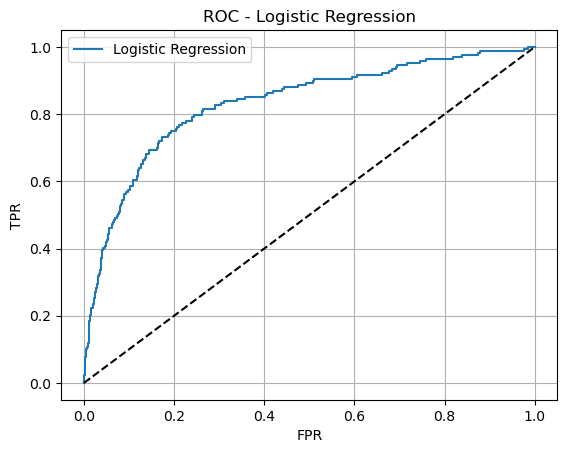

In [19]:
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_log))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_log)))
print("AUC:", roc_auc_score(y_val, y_proba_log))
print(classification_report(y_val, y_pred_log))
fpr, tpr, _ = roc_curve(y_val, y_proba_log)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

##  K-Nearest Neighbors (KNN)

In [21]:
knn_pipeline = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_val)
y_proba_knn = knn_pipeline.predict_proba(X_val)[:, 1]

Balanced Accuracy: 0.6191756444376205
RMSE: 0.31540832382450534
AUC: 0.6475601148131087
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11232
           1       0.05      0.33      0.09       167

    accuracy                           0.90     11399
   macro avg       0.52      0.62      0.52     11399
weighted avg       0.98      0.90      0.93     11399



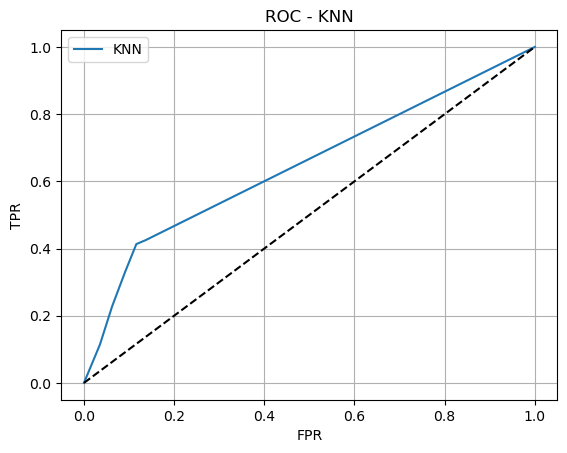

In [23]:
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_knn)))
print("AUC:", roc_auc_score(y_val, y_proba_knn))
print(classification_report(y_val, y_pred_knn))
fpr, tpr, _ = roc_curve(y_val, y_proba_knn)
plt.plot(fpr, tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - KNN')
plt.legend()
plt.grid(True)
plt.show()

## Optimized KNN (Low Resource) – No GridSearch, No Parallelism

In [109]:
# Apply preprocessing to training data first
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Apply SMOTE only once on the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print(f'Training set before SMOTE: {X_train.shape}, after SMOTE: {X_train_balanced.shape}')

Training set before SMOTE: (45594, 13), after SMOTE: (89854, 210)


In [111]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)
y_pred_knn = knn.predict(X_val_processed)
y_proba_knn = knn.predict_proba(X_val_processed)[:, 1]

In [112]:
print("Evaluation for KNN (No GridSearch)")
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_knn)))
print("AUC:", roc_auc_score(y_val, y_proba_knn))
print(classification_report(y_val, y_pred_knn))

Evaluation for KNN (No GridSearch)
Balanced Accuracy: 0.6191756444376205
RMSE: 0.31540832382450534
AUC: 0.6475601148131087
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11232
           1       0.05      0.33      0.09       167

    accuracy                           0.90     11399
   macro avg       0.52      0.62      0.52     11399
weighted avg       0.98      0.90      0.93     11399



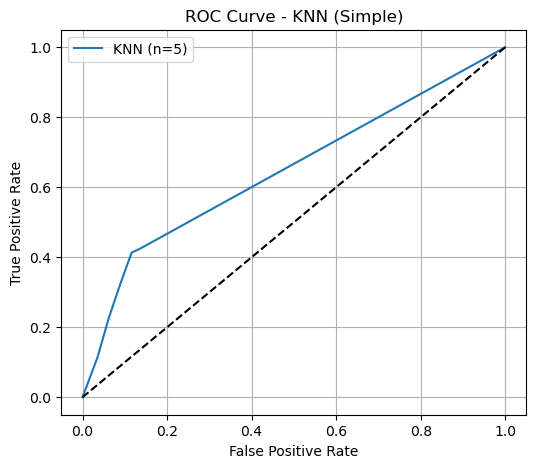

In [33]:
fpr, tpr, _ = roc_curve(y_val, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='KNN (n=5)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Simple)')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Classifier (Balanced, Interpretable)

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_val_processed)
y_proba_rf = rf.predict_proba(X_val_processed)[:, 1]

print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_rf)))
print("AUC:", roc_auc_score(y_val, y_proba_rf))
print(classification_report(y_val, y_pred_rf))

Balanced Accuracy: 0.7725177316307555
RMSE: 0.35861925856210314
AUC: 0.8359192405786717
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     11232
           1       0.07      0.67      0.13       167

    accuracy                           0.87     11399
   macro avg       0.53      0.77      0.53     11399
weighted avg       0.98      0.87      0.92     11399



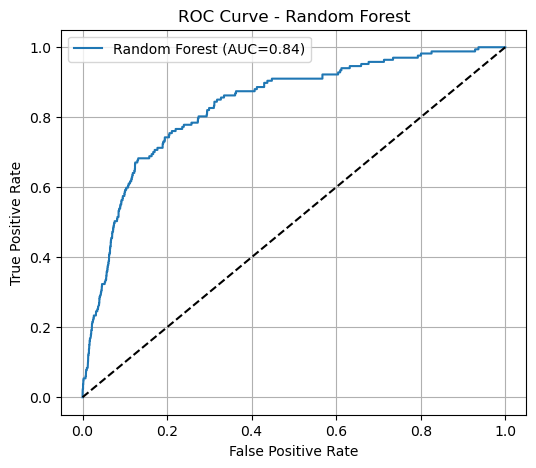

In [37]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_val, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## Feature Importance (Random Forest)

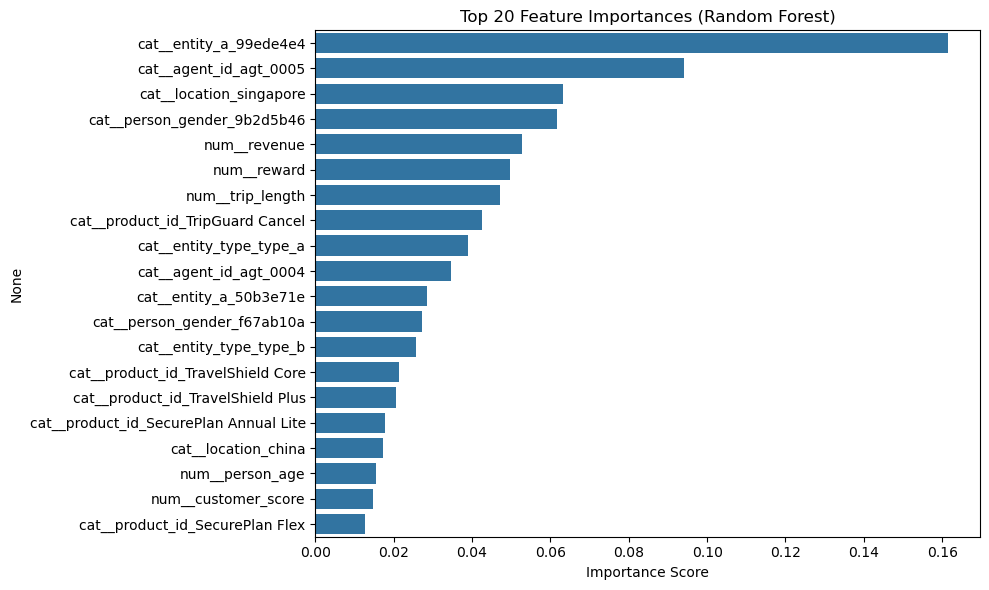

In [39]:
importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## XGBoost Classifier (Optimized for Rare Events)

In [129]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10, max_depth=4)
xgb.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb.predict(X_val_processed)
y_proba_xgb = xgb.predict_proba(X_val_processed)[:, 1]

print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_xgb)))
print("AUC:", roc_auc_score(y_val, y_proba_xgb))
print(classification_report(y_val, y_pred_xgb))

Balanced Accuracy: 0.733101105481345
RMSE: 0.49108197421124117
AUC: 0.7910535766074688
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     11232
           1       0.04      0.71      0.08       167

    accuracy                           0.76     11399
   macro avg       0.52      0.73      0.47     11399
weighted avg       0.98      0.76      0.85     11399



## Threshold Tuning for XGBoost (Custom Threshold = 0.3)

In [43]:
custom_thresh = 0.3
y_pred_thresh = (y_proba_xgb >= custom_thresh).astype(int)
print(f"Using threshold = {custom_thresh}")
print("Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred_thresh))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_thresh)))
print("AUC:", roc_auc_score(y_val, y_proba_xgb))
print(classification_report(y_val, y_pred_thresh))

Using threshold = 0.3
Balanced Accuracy: 0.7151996754354539
RMSE: 0.6030160764483212
AUC: 0.7910535766074688
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     11232
           1       0.03      0.80      0.06       167

    accuracy                           0.64     11399
   macro avg       0.51      0.72      0.42     11399
weighted avg       0.98      0.64      0.76     11399



## Combined ROC Curve: KNN vs RF vs XGBoost

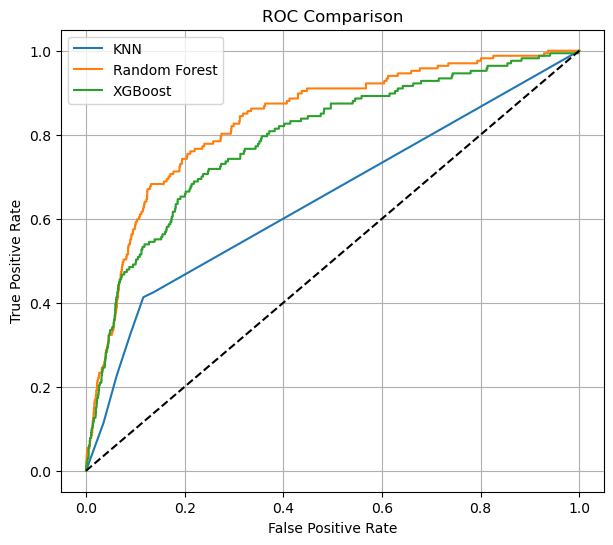

In [45]:
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_proba_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)

plt.figure(figsize=(7, 6))
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Predict on Test Data and Export Results

In [51]:
!pip install --upgrade scikit-learn

In [125]:
model_results = {
    "Model": ["KNN", "Random Forest", "XGBoost", "XGBoost (Threshold 0.3)"],
    "Balanced Accuracy": [
        balanced_accuracy_score(y_val, y_pred_knn),
        balanced_accuracy_score(y_val, y_pred_rf),
        balanced_accuracy_score(y_val, y_pred_xgb),
        balanced_accuracy_score(y_val, y_pred_thresh),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_val, y_pred_knn)),
        np.sqrt(mean_squared_error(y_val, y_pred_rf)),
        np.sqrt(mean_squared_error(y_val, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_val, y_pred_thresh)),
    ],
    "AUC": [
        roc_auc_score(y_val, y_proba_knn),
        roc_auc_score(y_val, y_proba_rf),
        roc_auc_score(y_val, y_proba_xgb),
        roc_auc_score(y_val, y_proba_xgb),  # same probs, different threshold
    ]
}

results_df = pd.DataFrame(model_results)
display(results_df)

Model  Balanced Accuracy      RMSE       AUC
0                      KNN           0.619176  0.315408  0.647560
1            Random Forest           0.772518  0.358619  0.835919
2                  XGBoost           0.733101  0.491082  0.791054
3  XGBoost (Threshold 0.3)           0.715200  0.603016  0.791054

In [63]:
test = pd.read_csv("data/insurance_test.csv")

In [65]:
test_copy = test.copy()

In [67]:
X_test_processed = preprocessor.transform(test_copy)

In [77]:
test_preds_proba = rf.predict_proba(X_test_processed)[:, 1]
test_preds_final = (test_preds_proba >= 0.5).astype(int)

In [73]:
test_copy["predicted_claim_status"] = test_preds_final
test_copy[["agent_id", "predicted_claim_status"]].to_csv("final_predictions.csv", index=False)

In [123]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [81]:
test["predicted_claim_status"] = test_preds_final
test.head(10)

reward person_gender entity_type channel  support_interactions  \
0  84.316320      9b2d5b46      type_a     web                     2   
1  45.884363      9b2d5b46      type_a     web                     0   
2   0.000000      9b2d5b46      type_a     web                     2   
3  29.363482      f67ab10a      type_b     web                     1   
4  12.440951      08f27188      type_b     web                     0   
5  10.554589      f67ab10a      type_a  retail                     1   
6  23.032416      9b2d5b46      type_a     web                     0   
7   0.593061      9b2d5b46      type_b     web                     1   
8   6.348724      08f27188      type_b     web                     1   
9   6.527074      08f27188      type_b     web                     2   

   agent_id  customer_score  entity_a  person_age     location     revenue  \
0  agt_0001        0.009257  96d6c6df          31      ireland -141.716239   
1  agt_0001        0.108049  96d6c6df          29    australia   82.225268   
2  agt_0004        0.108814  50b3e71e          26    indonesia   10.247118   
3  agt_0002        0.215505  7b5dbb09          32       france   83.483247   
4  agt_0005        0.194798  99ede4e4          26    singapore   46.679372   
5  agt_0015        0.318590  5d630515          59     thailand   29.677038   
6  agt_0001        0.260454  96d6c6df          34  new zealand   37.670204   
7  agt_0008        0.196252  b5e4bb23          48    singapore    2.190958   
8  agt_0002        0.190387  7b5dbb09          52     thailand   17.234293   
9  agt_0002        0.175124  7b5dbb09          37    indonesia   17.992485   

               product_id  trip_length  predicted_claim_status  
0  DriveSafe Rental Addon           73                       0  
1  DriveSafe Rental Addon           25                       0  
2        TripGuard Cancel            6                       0  
3      TravelShield Value           73                       0  
4       TravelShield Plus           32                       1  
5         CruiseSafe Trip            7                       0  
6  DriveSafe Rental Addon           71                       0  
7   TripGuard TicketCover            3                       0  
8      TravelShield Basic           14                       0  
9      TravelShield Basic          163                       0

In [85]:
test.to_csv("predicted_insurance.csv", index=False)
print("Predictions for test data is generated")

Predictions for test data is generated


In [127]:
with open('final_test_insurance.pkl', 'wb') as f:
    pickle.dump(test, f)

In [140]:
test_copy["predicted_claim_status"] = test_preds_final
test_copy[["agent_id", "predicted_claim_status"]].to_csv("final_predictions.csv", index=False)